# 2021389_Lab4_AI351
## Goals: Applying different models of machine learning and evaluating results using evaluation metrics.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = pd.read_csv('tripadvisor_european_restaurants(preprocessed).csv')
# df  = df.drop(columns='PassengerId')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   restaurant_link                    3000 non-null   int64
 1   restaurant_name                    3000 non-null   int64
 2   original_location                  3000 non-null   int64
 3   country                            3000 non-null   int64
 4   region                             3000 non-null   int64
 5   province                           3000 non-null   int64
 6   city                               3000 non-null   int64
 7   address                            3000 non-null   int64
 8   latitude                           3000 non-null   int64
 9   longitude                          3000 non-null   int64
 10  claimed                            3000 non-null   int64
 11  awards                             3000 non-null   int64
 12  popularity_detailed 

### Binning target column to apply classification models as well

In [30]:
# Define bin edges and labels for the 'avg_rating' column
rating_bin_edges = [0, 5.0, 10.0]
rating_bin_labels = ['worst','best']

# Cut the 'avg_rating' column into bins and assign labels
df['new_avg_rating'] = pd.cut(df['avg_rating'], bins=rating_bin_edges, labels=rating_bin_labels, right=False)

In [31]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   restaurant_link                    3000 non-null   int64
 1   restaurant_name                    3000 non-null   int64
 2   original_location                  3000 non-null   int64
 3   country                            3000 non-null   int64
 4   region                             3000 non-null   int64
 5   province                           3000 non-null   int64
 6   city                               3000 non-null   int64
 7   address                            3000 non-null   int64
 8   latitude                           3000 non-null   int64
 9   longitude                          3000 non-null   int64
 10  claimed                            3000 non-null   int64
 11  awards                             3000 non-null   int64
 12  popularity_detailed 

In [33]:
df

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,very_good,average,poor,terrible,food,service,value,atmosphere,keywords,new_avg_rating
0,0,1354,235,0,9,36,255,168,987,766,...,0,0,0,0,5,6,5,9,24,0
1,1,1815,235,0,9,36,255,564,986,781,...,2,1,0,0,8,8,8,9,24,0
2,2,82,96,0,3,10,223,836,1052,848,...,1,0,0,0,8,8,8,9,24,0
3,3,1778,217,0,9,15,113,2163,922,984,...,0,0,0,0,6,6,6,9,24,0
4,4,2369,257,0,10,7,256,2837,442,1928,...,7,0,0,0,6,6,6,9,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,1710,273,0,10,40,296,936,158,2115,...,2,0,0,2,3,4,3,4,24,1
2996,2996,1453,273,0,10,40,296,786,146,2129,...,15,6,3,13,4,4,3,9,24,0
2997,2997,1550,273,0,10,40,296,972,145,2112,...,0,0,0,0,8,8,8,9,24,0
2998,2998,1466,273,0,10,40,296,1347,140,2104,...,2,0,0,0,5,6,5,8,24,0


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [8]:
df.head(2)

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,very_good,average,poor,terrible,food,service,value,atmosphere,keywords,new_avg_rating
0,0,1354,235,0,9,36,255,168,987,766,...,0,0,0,0,5,6,5,9,24,0
1,1,1815,235,0,9,36,255,564,986,781,...,2,1,0,0,8,8,8,9,24,0



# Regression

In [5]:
df2 = pd.read_csv('tripadvisor_european_restaurants(preprocessed).csv')

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   restaurant_link                    3000 non-null   int64
 1   restaurant_name                    3000 non-null   int64
 2   original_location                  3000 non-null   int64
 3   country                            3000 non-null   int64
 4   region                             3000 non-null   int64
 5   province                           3000 non-null   int64
 6   city                               3000 non-null   int64
 7   address                            3000 non-null   int64
 8   latitude                           3000 non-null   int64
 9   longitude                          3000 non-null   int64
 10  claimed                            3000 non-null   int64
 11  awards                             3000 non-null   int64
 12  popularity_detailed 

## Loading Dataframe and SPlitting to X (Training) and Y (Testing) data

In [7]:
# Select the columns based on indices
df1_part1 = df2.iloc[:, :28]
df1_part2 = df2.iloc[:, 29:]

# Concatenate the two parts horizontally
concatenated_df = pd.concat([df1_part1, df1_part2], axis=1)

concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   restaurant_link                    3000 non-null   int64
 1   restaurant_name                    3000 non-null   int64
 2   original_location                  3000 non-null   int64
 3   country                            3000 non-null   int64
 4   region                             3000 non-null   int64
 5   province                           3000 non-null   int64
 6   city                               3000 non-null   int64
 7   address                            3000 non-null   int64
 8   latitude                           3000 non-null   int64
 9   longitude                          3000 non-null   int64
 10  claimed                            3000 non-null   int64
 11  awards                             3000 non-null   int64
 12  popularity_detailed 

In [8]:
X = concatenated_df
y = df2['avg_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

1. Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [10]:
print(regr.score(X_test, y_test))

0.5163707070457391


In [11]:
y_pred = regr.predict(X_test)

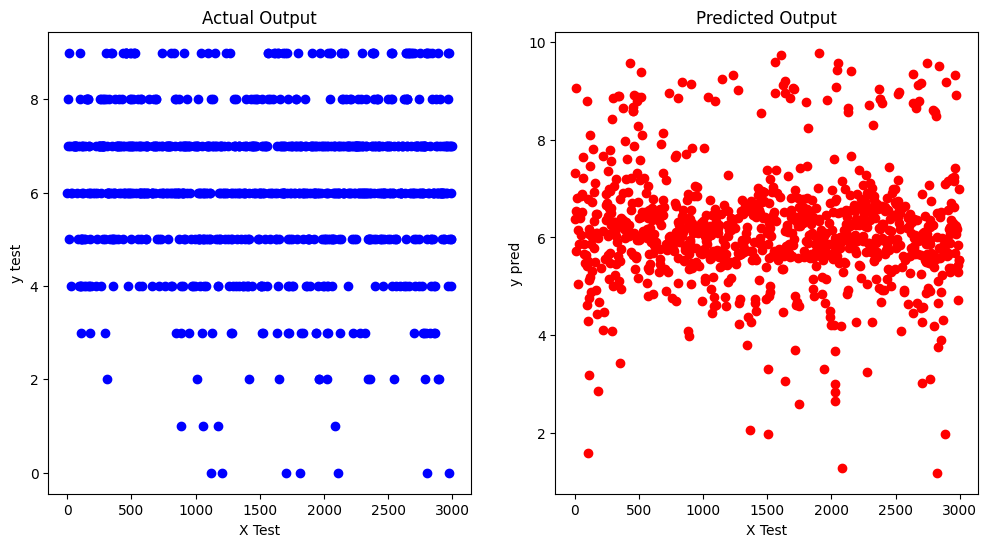

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_test.index, y_test, color ='b')
plt.title('Actual Output')
plt.xlabel('X Test')
plt.ylabel('y test')
plt.subplot(1, 2, 2)

plt.scatter(X_test.index, y_pred, color ='red')
plt.title('Predicted Output')
plt.xlabel('X Test')
plt.ylabel('y pred')
plt.savefig("Actual Output vs Predicted Output(Linear Regression).pdf",dpi=300,format="pdf",bbox_inches="tight")
plt.show()

### Evaluation metrics in the form of Loss Functions

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,roc_auc_score

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.786830766967498
MSE: 1.301082212687198
RMSE: 1.140649908029277


2. Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)
print(poly_reg_model.intercept_, poly_reg_model.coef_)

6.474185370091599 [-1.49334017e-11  6.89375305e-11  5.75234244e-12 ... -5.98295345e-10
 -5.45753866e-10  2.72985114e-10]


In [16]:
y_predicted = poly_reg_model.predict(poly_features)

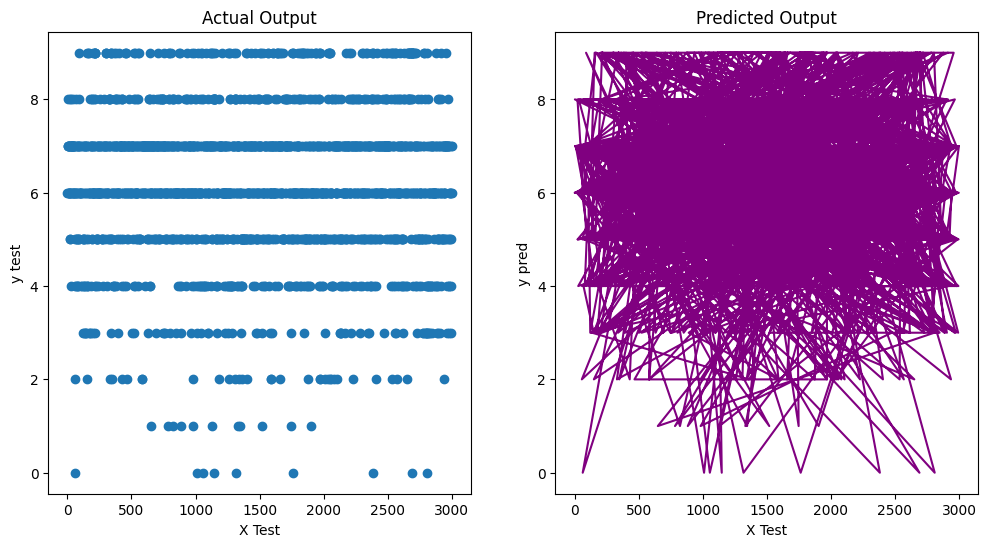

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_train.index, y_train)
plt.title('Actual Output')
plt.xlabel('X Test')
plt.ylabel('y test')
plt.subplot(1, 2, 2)
plt.plot(X_train.index, y_predicted, color='purple')
plt.title('Predicted Output')
plt.xlabel('X Test')
plt.ylabel('y pred')
plt.savefig("Actual Output vs Predicted Output.pdf(Polynomial Regression)",dpi=300,format="pdf",bbox_inches="tight")
plt.show()

In [18]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.786830766967498
MSE: 1.301082212687198
RMSE: 1.140649908029277


3. Lasso Regression

In [19]:
# Lasso Regression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)
print(clf.coef_)
print(clf.intercept_)

[-3.42733863e-05 -3.37629232e-05 -7.94389564e-04  0.00000000e+00
 -0.00000000e+00 -1.83758961e-03  7.76566277e-05 -1.23817835e-04
 -9.03227046e-05 -2.45738074e-05 -0.00000000e+00 -5.72344713e-03
  2.53034253e-04 -3.43510770e-04 -1.77298499e-04 -0.00000000e+00
 -6.07093322e-04 -2.70150918e-03 -2.53262992e-04 -2.04538328e-02
 -3.64069471e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.44997705e-04 -0.00000000e+00 -2.03275493e-03 -0.00000000e+00
  1.26896659e-03  0.00000000e+00 -4.53826608e-02  8.13925737e-02
  3.75465516e-02  5.01866048e-03  0.00000000e+00 -2.58292888e-02
  1.56257955e-01  8.77546431e-02  0.00000000e+00  4.99199481e-02
  0.00000000e+00]
6.142555344074809


In [20]:
y_pred = clf.predict(X_test)

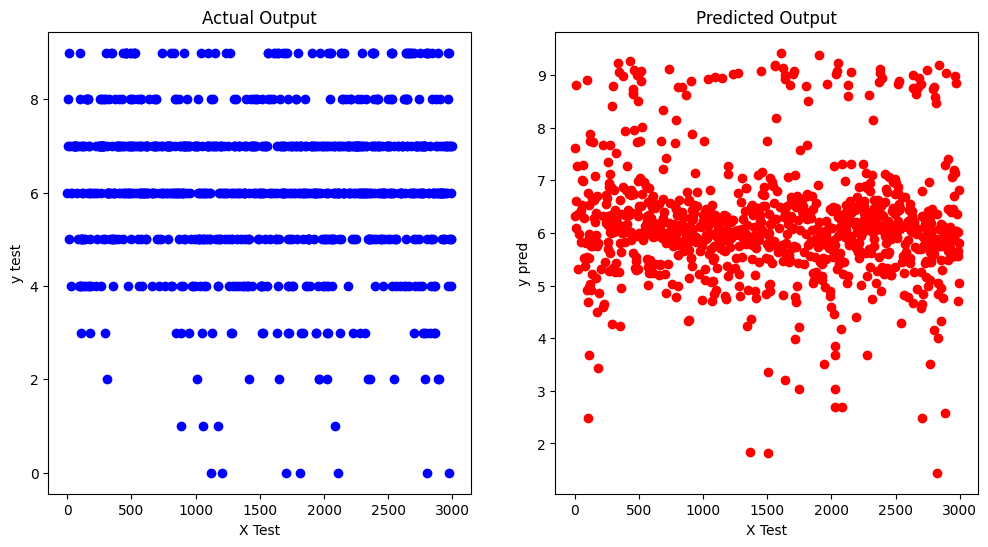

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_test.index, y_test, color ='b')
plt.title('Actual Output')
plt.xlabel('X Test')
plt.ylabel('y test')
plt.subplot(1, 2, 2)
plt.scatter(X_test.index, y_pred, color ='red')
plt.title('Predicted Output')
plt.xlabel('X Test')
plt.ylabel('y pred')
plt.savefig("Actual Output vs Predicted Output(Lasso).pdf",dpi=300,format="pdf",bbox_inches="tight")
plt.show()

In [22]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.8055118089775404
MSE: 1.373399659251155
RMSE: 1.1719213536970623


4. Ridge Regression

In [23]:
# Ridge Regresssion
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

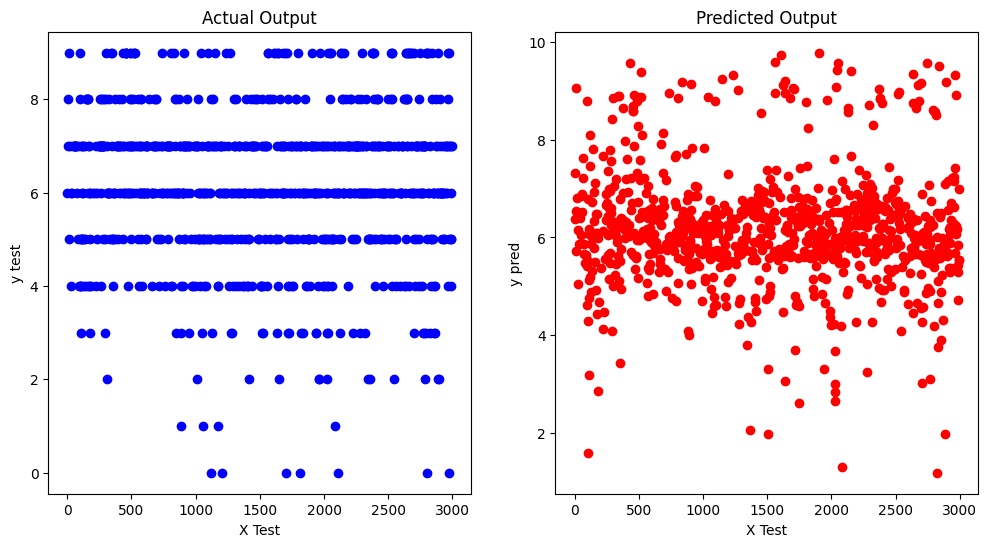

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_test.index, y_test, color ='b')
plt.title('Actual Output')
plt.xlabel('X Test')
plt.ylabel('y test')
plt.subplot(1, 2, 2)
plt.scatter(X_test.index, y_pred, color ='red')
plt.title('Predicted Output')
plt.xlabel('X Test')
plt.ylabel('y pred')
plt.savefig("Actual Output vs Predicted Output(Ridge).pdf",dpi=300,format="pdf",bbox_inches="tight")
plt.show()

In [25]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.7868044261765481
MSE: 1.3010614826683549
RMSE: 1.1406408210599666


5. Elastic Net Regression

In [26]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

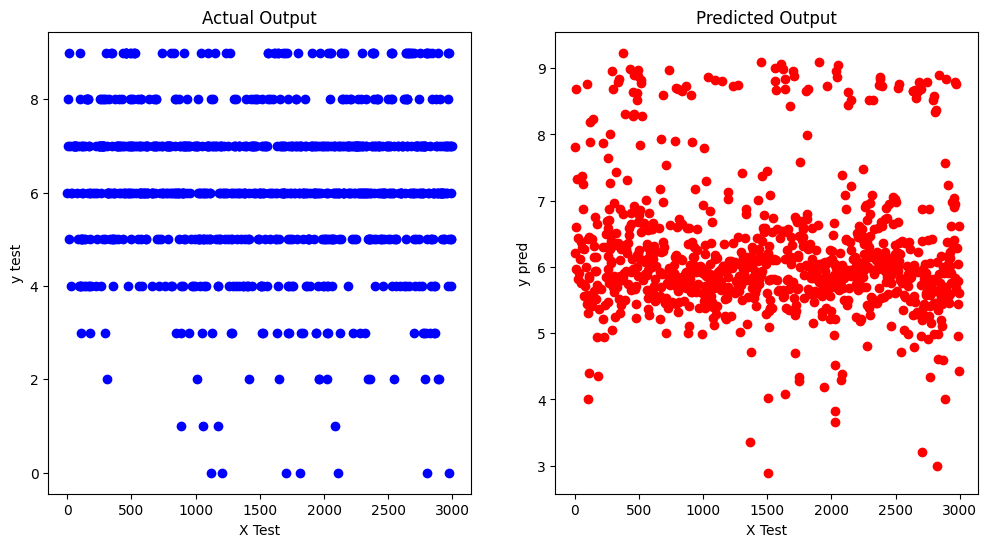

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_test.index, y_test, color ='b')
plt.title('Actual Output')
plt.xlabel('X Test')
plt.ylabel('y test')
plt.subplot(1, 2, 2)
plt.scatter(X_test.index, y_pred, color ='red')
plt.title('Predicted Output')
plt.xlabel('X Test')
plt.ylabel('y pred')
plt.savefig("Actual Output vs Predicted Output(Elastic Net).pdf",dpi=300,format="pdf",bbox_inches="tight")
plt.show()

In [28]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.8873030660115088
MSE: 1.523407042119879
RMSE: 1.2342637652138537


# Decision Tree

In [34]:
X = df.drop('new_avg_rating',axis=1)
y = df['new_avg_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

[[778   0]
 [  0 122]]


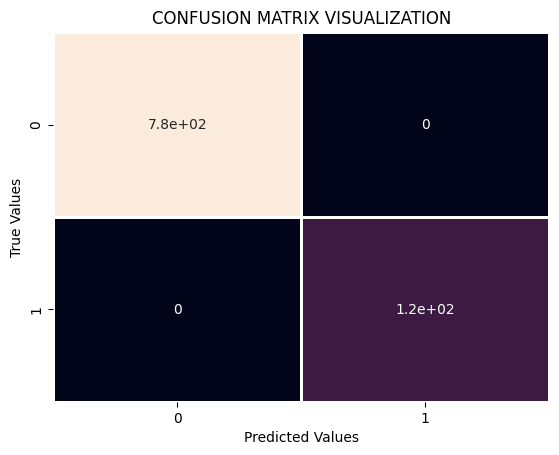

In [35]:
model1 = DecisionTreeClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

In [36]:
res = classification_report(y_test,y_pred)
print(res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       778
           1       1.00      1.00      1.00       122

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [38]:
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)

# Make predictions
y_pred = logistic_reg.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.86
Precision: 0.40
Recall: 0.10
F1 Score: 0.16
Confusion Matrix:
[[760  18]
 [110  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       778
           1       0.40      0.10      0.16       122

    accuracy                           0.86       900
   macro avg       0.64      0.54      0.54       900
weighted avg       0.81      0.86      0.82       900



d:\ML lab\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
!pip install xgboost lightgbm

^C


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.0/99.7 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.1/99.7 MB 469.7 kB/s eta 0:03:33
   ---------------------------------------- 0.1/99.7 MB 469.7 kB/s eta 0:03:33
   ---------------------------------------- 0.1/99.7 MB 328.6 kB/s eta 0:05:04
   ---------------------------------------- 0.1/99.7 MB 350.1 kB/s eta 0:04:45
   ---------------------------------------- 0.

# Lets Try Multiple Models in a Loop

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [41]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(),
    LGBMClassifier(),
    MLPClassifier()
]

In [42]:
# Iterate through models and evaluate their performance
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Print or store the evaluation metrics for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("\n")

d:\ML lab\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.86
Precision: 0.40
Recall: 0.10
F1 Score: 0.16
ROC-AUC: 0.54
Confusion Matrix:
[[760  18]
 [110  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       778
           1       0.40      0.10      0.16       122

    accuracy                           0.86       900
   macro avg       0.64      0.54      0.54       900
weighted avg       0.81      0.86      0.82       900



Model: DecisionTreeClassifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00
Confusion Matrix:
[[778   0]
 [  0 122]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       778
           1       1.00      1.00      1.00       122

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



Model: Rando

d:\ML lab\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ML lab\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ML lab\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ML lab\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Prec

Model: SVC
Accuracy: 0.86
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC-AUC: 0.50
Confusion Matrix:
[[778   0]
 [122   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       778
           1       0.00      0.00      0.00       122

    accuracy                           0.86       900
   macro avg       0.43      0.50      0.46       900
weighted avg       0.75      0.86      0.80       900



Model: KNeighborsClassifier
Accuracy: 0.85
Precision: 0.36
Recall: 0.13
F1 Score: 0.19
ROC-AUC: 0.55
Confusion Matrix:
[[750  28]
 [106  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       778
           1       0.36      0.13      0.19       122

    accuracy                           0.85       900
   macro avg       0.62      0.55      0.56       900
weighted avg       0.81      0.85      0.82       900



Model: GaussianNB
Accuracy: 0

d:\ML lab\myenv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\ML lab\myenv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
d:\ML lab\myenv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
d:\ML lab\myenv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\ML lab\myenv\Lib\site-packages\xgb

Model: XGBClassifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00
Confusion Matrix:
[[778   0]
 [  0 122]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       778
           1       1.00      1.00      1.00       122

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



[LightGBM] [Info] Number of positive: 284, number of negative: 1816
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4360
[LightGBM] [Info] Number of data points in the train set: 2100, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.135238 -> initscore=-1.855417
[LightGBM] [I

# Some more Models

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
import warnings

# Filter out LightGBM warnings
warnings.filterwarnings("ignore")

d:\ML lab\myenv\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [44]:
# Add these models to the list of models
models.extend([
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RidgeClassifier(),
    SGDClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    HistGradientBoostingClassifier(),
    GaussianProcessClassifier(),
    MLPClassifier(max_iter=1000),
    VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier()),
        ('lgbm', LGBMClassifier())
    ]),
    StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier()),
        ('lgbm', LGBMClassifier())
    ], final_estimator=LogisticRegression())
])



In [45]:

with open("warnings.log", "w"):
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)



In [46]:
from sklearn.metrics import auc

[LightGBM] [Info] Number of positive: 284, number of negative: 1816
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4360
[LightGBM] [Info] Number of data points in the train set: 2100, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.135238 -> initscore=-1.855417
[LightGBM] [Info] Start training from score -1.855417
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

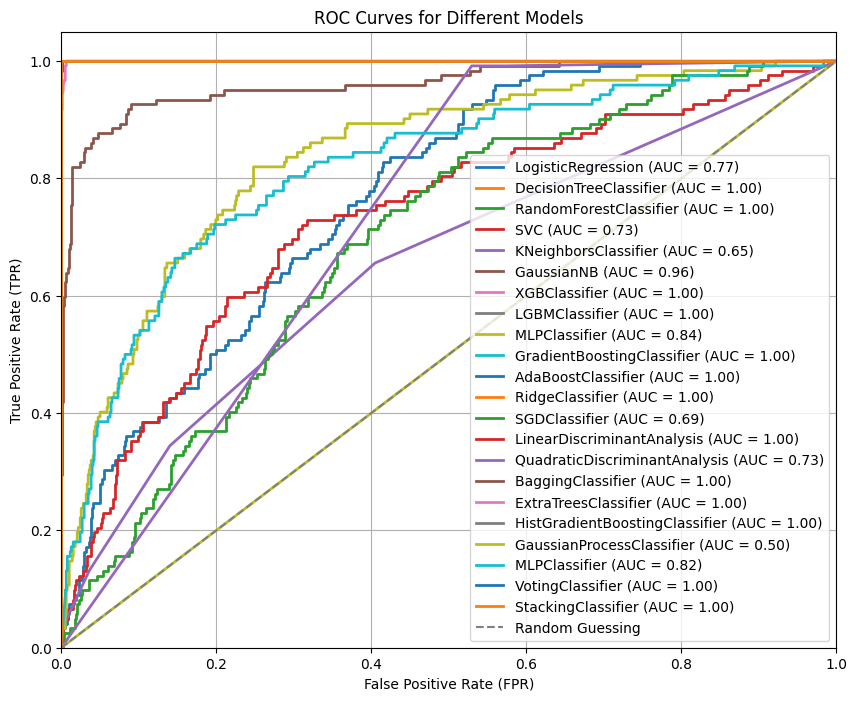

In [48]:
roc_data = {}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model in models:
    model_name = model.__class__.__name__

    # Fit the model
    model.fit(X_train, y_train)

    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        # Get predicted probabilities for positive class
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict directly
        if hasattr(model, "decision_function"):
            y_pred_prob = model.decision_function(X_test)
        else:
            y_pred_prob = model.predict(X_test)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Store ROC curve data
    roc_data[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("Roc curve.pdf",dpi=300,format="pdf",bbox_inches="tight")
# Show the plot
plt.show()

In [28]:
!pip install evalml

In [31]:
import evalml

In [32]:
import evalml
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

In [33]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

[LightGBM] [Info] Number of positive: 243, number of negative: 973
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2569
[LightGBM] [Info] Number of data points in the train set: 1216, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199836 -> initscore=-1.387323
[LightGBM] [Info] Start training from score -1.387323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model': 4.134273290634155,
  'Total time of batch': 4.283808946609497},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer': 1.9553680419921875,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer': 2.5944197177886963,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer': 4.3702473640441895,
  'XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer': 9.040188312530518,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer': 11.68889570236206,
  'Total time of batch': 30.294830799102783}}

In [34]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,0.000012,0.000012,1.681171e-08,99.999743,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,0.001472,0.001472,4.714493e-06,99.968809,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,0.002067,0.002067,3.931545e-05,99.956208,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,6,Logistic Regression Classifier w/ Label Encode...,6,0.002245,0.002245,3.105127e-05,99.952434,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.015534,0.015534,8.905524e-04,99.670887,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,0.039148,0.039148,1.848940e-03,99.170586,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Binary Classification Pipeline,0,4.720002,4.720002,2.972830e-02,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [35]:
# Getting The Best Pipeline
automl.best_pipeline
best_pipeline=automl.best_pipeline

In [36]:
# Let's Check the detailed desscription
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*********************************************************************************************


* LightGBM Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer *


INFO:evalml.pipelines.pipeline_base.describe:* LightGBM Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer *


*********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: LightGBM


INFO:evalml.pipelines.pipeline_base.describe:Model Family: LightGBM


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Oversampler


INFO:evalml.pipelines.component_graph.describe:3. Oversampler


	 * sampling_ratio : 0.25


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio : 0.25


	 * k_neighbors_default : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors_default : 5


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


	 * sampling_ratio_dict : None


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio_dict : None


	 * k_neighbors : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors : 5


4. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:4. Select Columns Transformer


	 * columns : ['city', 'address', 'latitude', 'longitude', 'awards', 'popularity_detailed', 'popularity_generic', 'top_tags', 'cuisines', 'features', 'avg_rating', 'total_reviews_count', 'default_language', 'reviews_count_in_default_language', 'excellent', 'average', 'terrible', 'food', 'service', 'value', 'new_avg_rating']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['city', 'address', 'latitude', 'longitude', 'awards', 'popularity_detailed', 'popularity_generic', 'top_tags', 'cuisines', 'features', 'avg_rating', 'total_reviews_count', 'default_language', 'reviews_count_in_default_language', 'excellent', 'average', 'terrible', 'food', 'service', 'value', 'new_avg_rating']


5. LightGBM Classifier


INFO:evalml.pipelines.component_graph.describe:5. LightGBM Classifier


	 * boosting_type : gbdt


INFO:evalml.pipelines.components.component_base.describe:	 * boosting_type : gbdt


	 * learning_rate : 0.1


INFO:evalml.pipelines.components.component_base.describe:	 * learning_rate : 0.1


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 0


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 0


	 * num_leaves : 31


INFO:evalml.pipelines.components.component_base.describe:	 * num_leaves : 31


	 * min_child_samples : 20


INFO:evalml.pipelines.components.component_base.describe:	 * min_child_samples : 20


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


	 * bagging_freq : 0


INFO:evalml.pipelines.components.component_base.describe:	 * bagging_freq : 0


	 * bagging_fraction : 0.9


INFO:evalml.pipelines.components.component_base.describe:	 * bagging_fraction : 0.9


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 2.0 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 2.0 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.000       1.000 1.000 1.000      1.000 1.000                     1.000            1.000      1,400          700
1                      0.000       1.000 1.000 1.000      1.000 1.000                     1.000            1.000      1,400          700
2                      0.000       1.000 1.000 1.000      1.000 1.000                     1.000            1.000      1,400          700
mean                   0.000       1.000 1.000 1.000      1.000 1.000                     1.000            1.000          -            -
std                    0.000       0.000 0.000 0.000      0.000 0.000                     0.000            0.000          -            -
coef of var            0.001       0.000 0.000 0.000      0.000 0.000                     0.000            0.000          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.000       1.000 1.000 1.000      1.000 1.000                     1.000            1.000      1,400          700
1                      0.000       1.000 1.000 1.000      1.000 1.000                     1.000            1.000      1,400          700
2                      0.000       1.000 1.000 1.000      1.000 1.000                     1.000            1.000      1,400          700
mean                   0.000       1.000 1.000 1.000      1.000 1.000                     1.000            1.000          -            -
std                    0.000       0.000 0.000 0.000      0.000 0.000                     0.000            0.000          -            -
coef of var            0.001       0.000 0.000 0.000      0.000 0.000                     0.000            0.000          -    

In [37]:
### Evaluate on hold out data
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 1.0), ('F1', 1.0), ('Precision', 1.0), ('Recall', 1.0)])

In [38]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model': 4.621315240859985,
  'Total time of batch': 4.770976305007935}}

In [39]:
automl_auc.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,1.0,1.0,0.0,50.0,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,0,Mode Baseline Binary Classification Pipeline,0,0.5,0.5,0.0,0.0,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [40]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


*******************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*******************************************************************************************************


* Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model *


*******************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*******************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Oversampler


INFO:evalml.pipelines.component_graph.describe:3. Oversampler


	 * sampling_ratio : 0.25


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio : 0.25


	 * k_neighbors_default : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors_default : 5


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


	 * sampling_ratio_dict : None


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio_dict : None


	 * k_neighbors : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors : 5


4. RF Classifier Select From Model


INFO:evalml.pipelines.component_graph.describe:4. RF Classifier Select From Model


	 * number_features : None


INFO:evalml.pipelines.components.component_base.describe:	 * number_features : None


	 * n_estimators : 10


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 10


	 * max_depth : None


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : None


	 * percent_features : 0.5


INFO:evalml.pipelines.components.component_base.describe:	 * percent_features : 0.5


	 * threshold : median


INFO:evalml.pipelines.components.component_base.describe:	 * threshold : median


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


5. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:5. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 4.6 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 4.6 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


              AUC    F1  Precision # Training # Validation
0           1.000 1.000      1.000      1,400          700
1           1.000 1.000      1.000      1,400          700
2           1.000 1.000      1.000      1,400          700
mean        1.000 1.000      1.000          -            -
std         0.000 0.000      0.000          -            -
coef of var 0.000 0.000      0.000          -            -


INFO:evalml.automl.automl_search.describe_pipeline:              AUC    F1  Precision # Training # Validation
0           1.000 1.000      1.000      1,400          700
1           1.000 1.000      1.000      1,400          700
2           1.000 1.000      1.000      1,400          700
mean        1.000 1.000      1.000          -            -
std         0.000 0.000      0.000          -            -
coef of var 0.000 0.000      0.000          -            -


In [43]:
best_pipeline_auc = automl_auc.best_pipeline

In [44]:
# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

OrderedDict([('AUC', 1.0)])

In [45]:
best_pipeline.save("model.pkl")

In [46]:
check_model=automl.load('model.pkl')

In [47]:
df3 = pd.DataFrame(check_model.predict_proba(X_test))
df3

,0,1
136,0.000033,0.999967
2646,0.999991,0.000009
52,0.999991,0.000009
2695,0.999991,0.000009
797,0.999991,0.000009
...,...,...
262,0.999991,0.000009
405,0.999991,0.000009
2569,0.000033,0.999967
297,0.999991,0.000009
